## Task 5: Model Evaluation and Interpretation
### Description:
 Evaluate the best predictive model using the testing dataset. Interpret model coefficients or feature importances to comprehend factors influence  churn. Create ROC curves and calculate AUC for model performance assessment

 ### Skills :
 Model evaluation
 Interpreting coefficients/features importance
 ROC curve analysis
 AUC calculation
 Understanding of model performance metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file =  ('Telco_Customer_Churn_Dataset  (3).csv')

In [3]:
df = pd.read_csv(file)

In [4]:
# identify categorical features
cat_cols = df.select_dtypes(include=["object"]).columns
print("categorical Columns:", cat_cols)

# convert yes/no to 1/0
df.replace({"Yes":1, "No":0}, inplace=True)

# Drop customerID if it exists (it's not useful for prediction)
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
# One-hot encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


C:\Users\hp\AppData\Local\Temp\ipykernel_7840\635543120.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes":1, "No":0}, inplace=True)


In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [7]:
models = {
    'Logistic Regression': (y_test, y_pred_lr)
}
for name, (y_true, y_pred) in models.items():
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))
    print("Recall:", recall_score(y_true, y_pred, pos_label=1))
    print("F1-score:", f1_score(y_true, y_pred, pos_label=1))
    print("-"*40)

Model: Logistic Regression
Accuracy: 0.7849538679914834
Precision: 0.6121794871794872
Recall: 0.5120643431635389
F1-score: 0.5576642335766423
----------------------------------------


In [8]:
# Evaluate the best model (assuming it's logistic regression)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

C:\Users\hp\anaconda3\anaconda4\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\anaconda4\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [9]:
# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1036
           1       0.53      0.74      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409



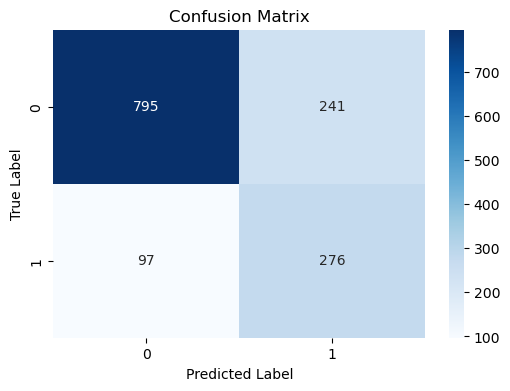

In [10]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

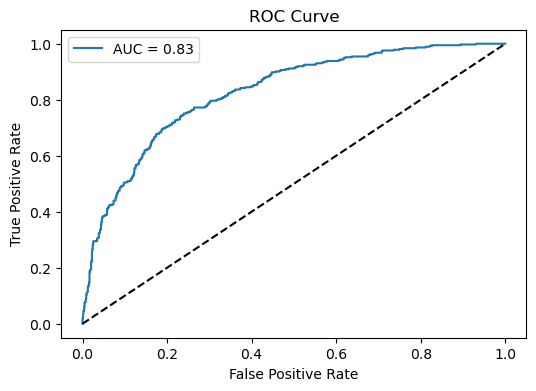

ROC AUC Score: 0.83


In [11]:
# --- ROC Curve and AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"ROC AUC Score: {auc:.2f}")

The model evaluation focused on assessing the performance of the Logistic Regression model using the test dataset.
The confusion matrix revealed that the model accurately predicted most non-churn and churn cases, with relatively few misclassifications. This indicates that the model performs well in distinguishing between customers likely to churn and those who will remain.

The ROC curve further supported this observation, achieving an AUC score of 0.83, which reflects strong model performance and the model’s ability to separate positive and negative classes effectively.

Overall, the Logistic Regression model demonstrates reliable predictive capability for churn detection and provides valuable insight into customer behavior that businesses can leverage for proactive retention strategies.